# Introdução a Manipulação de Dados Geoespaciais

Neste curso vamos fazer uso da biblioteca geopandas para manipular dados georeferenciados, ou seja, dados que possuem informações espaciais, tais como latitude e longitude. A biblioteca geopandas é uma extensão da biblioteca pandas, logo seu  funcionamento ocorre de forma semelhante. Em conjuntos de dados geopandas as bases contém a parte do dataframe e uma parte geométrica, a qual contém as informações da geometria espacial dos dados (Shape). 

Neste trabalho vamos realizar uma análise do número de roubos ocorridos no estado de São Paulo. Os dados podem ser consultados no seguinte endereço web: [página oficial do IBGE](https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html?=&t=acesso-ao-produto). 

Dados espaciais podem ser armazenados em diferentes padrões de arquivos, atualmente os mais empregados são: Shapefile, GeoJSON, NetCF4 (Big Data), KML e GPKG. No nosso caso, temos os dados do município no formato shapefile (Após descompactar a pasta .zip, vamos lê apenas o arquivo com a extensão .shp). 

In [1]:
# Carregando a biblioteca geopandas
import geopandas as gpd

In [2]:
# Lê o arquivo Shapefile
data = gpd.read_file("/home/wesley/Downloads/DatasetsTutorials/GeopandasCurse/SP_Municipios_2021/SP_Municipios_2021.shp")

# Vendo o tipo da variavel data
type(data)

geopandas.geodataframe.GeoDataFrame

## Analisando os Dados

In [3]:
# Vendo uma parte dos dados
data.head()

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,3500105,Adamantina,SP,411.987,"POLYGON ((-51.05425 -21.40465, -51.05300 -21.4..."
1,3500204,Adolfo,SP,211.055,"POLYGON ((-49.65795 -21.20333, -49.65645 -21.2..."
2,3500303,Aguaí,SP,474.554,"POLYGON ((-46.97640 -21.96818, -46.97599 -21.9..."
3,3500402,Águas da Prata,SP,142.673,"POLYGON ((-46.73501 -21.81891, -46.73431 -21.8..."
4,3500501,Águas de Lindóia,SP,60.126,"POLYGON ((-46.60614 -22.44173, -46.60347 -22.4..."


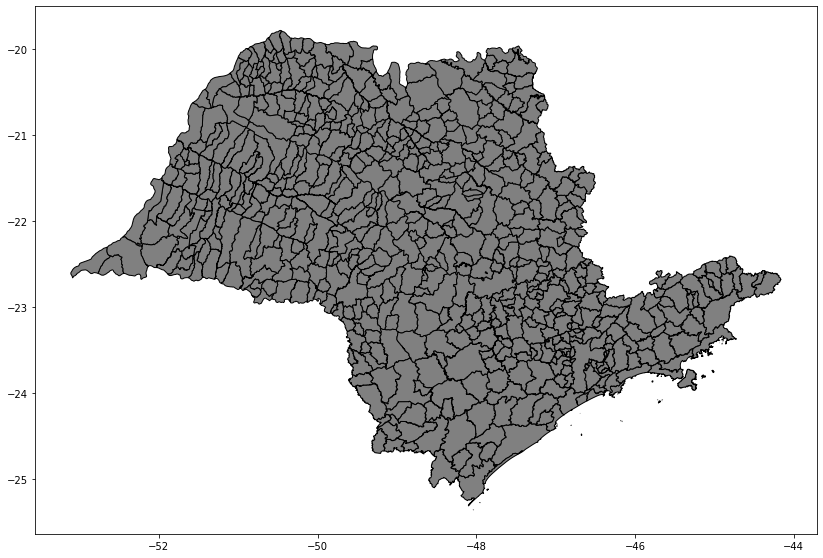

In [5]:
# Criando um mapa para os dados geométricos (Depende da lib descartes, instale)

data.plot(figsize = (14, 12), facecolor="gray", edgecolor="black");

In [8]:
# Filtrando os dados para a capital

data_sp = data[data["NM_MUN"] == "São Paulo"]
data_sp.head()

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
562,3550308,São Paulo,SP,1521.202,"POLYGON ((-46.54624 -23.35791, -46.54585 -23.3..."


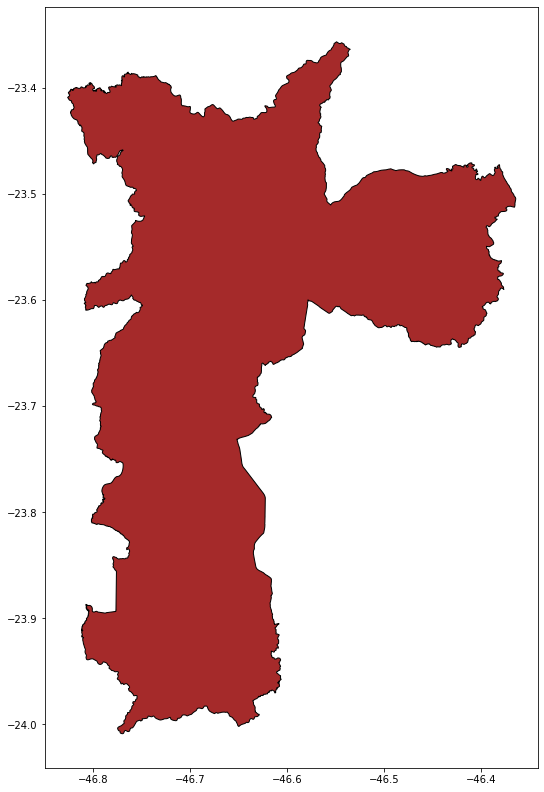

In [11]:
# Pltando um gráfico para a cidade de São Paulo

data_sp.plot(figsize = (10, 14), facecolor="brown", edgecolor="black");

In [12]:
# Salvando o arquivo no formato shapefile
data_sp.to_file("/home/wesley/Downloads/DatasetsTutorials/GeopandasCurse/SP_Municipios_2021/Capital_Shape/Shapefile/sao_paulo_capital.shp")

/home/wesley/geoprocess/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [13]:
# Salvando o arquivo no formato Json
data_sp.to_file("/home/wesley/Downloads/DatasetsTutorials/GeopandasCurse/SP_Municipios_2021/Capital_Shape/GeoJson/sao_paulo_capital.json", driver="GeoJSON")

/home/wesley/geoprocess/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [14]:
# Lendo os dados no formato Json

data_json = gpd.read_file("/home/wesley/Downloads/DatasetsTutorials/GeopandasCurse/SP_Municipios_2021/Capital_Shape/GeoJson/sao_paulo_capital.json", driver="GeoJSON")

data_json.head()

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,3550308,São Paulo,SP,1521.202,"POLYGON ((-46.54624 -23.35791, -46.54585 -23.3..."


# O Modelo Espacial de Dados

Os principais objetos geométricos na análise de dados espaciais são: Points, Lines e Polygons. A biblioteca Shapely pode ser empregada para definir e realizar operações com os objetos deste tipo. 

As principais vantagens e funcionalidades de se trabalhar com esses objetos são:

- Criar objetos básicos, como: Point, Line, Polygon e outros;
- Calcular área, tamanho, limite dos objetos geométricos;
- Desenvolver operações geométricas, como: Union, Intersection, Difference, Distance e etc;
- Desenvolver consultas espaciais entre geometrias, como: Intersects, Touches, Crosses, Within e etc.

Estes objetos geométricos são formados por tuplas de coordenadas, no qual:

- Point: define um ponto no espaço. Este pode ser bidimensional (x, y) ou tridimensional (x, y, z);
- LineString: define uma sequência de pontos para formar uma linha. Como sabemos uma linha (ou reta) consiste de pelo menos dois pontos.
- Polygon: este define um polígono preenchido, formado por uma lista de pelo menos três pontos, que indicam uma estrutura de anel externo. Os polígonos também podem apresentar aberturas internas (buracos). 

Para todos estes objetos podemos desenvolver uma série de cálculos, alguns empregados apenas para alguns dos tipo de objetos.


### O Objeto Point (Ponto)

Casos de uso: 

- Definir um ponto de Interesse em um mapa;
- Localização e residência;
- Ocorrência de acidente, roubo, chamada telefônicas, entre outros;

In [1]:
# Importar os objetos geometricos

from shapely.geometry import Point, LineString, Polygon

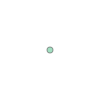

In [3]:
# Definindo um objeto point
ponto = Point(100, 105)

# Imprimindo na tela
ponto

In [4]:
# Imprimindo o objeto com print
print(ponto)

POINT (100 105)


In [7]:
# Alguns metodos do objeto Point

# Extrair coordenadas de um ponto
list(ponto.coords)

[(100.0, 105.0)]

In [9]:
# Calcular a distância entre os dois pontos

# Ponto real da residencia A
ponto_a = Point(-8.507784, -39.309914)

# Ponto real da residencia B
ponto_b = Point(-8.081673, -37.639423)


# Calculando a distancia

distancia = ponto_a.distance(ponto_b)

# Este metodo calcula a distancia euclidiana entre os pontos, ele considera
# o espaco no plano cartesiano, logo nao existe um suporte ao sistema
# de coordenadas.  

print("A distância entre os dois pontos é de {0}.".format(distancia))

A distância entre os dois pontos é de 1.7239810803491997.


In [49]:
# Existem outros metodos mais robustos para calcular a distancia entre pontos. 
# Considerando o sistema de coordenadas geograficas SIRGAS2000 (EPSG:31984)
from shapely.geometry import Point, shape
from pyproj import Proj, transform

ponto_a = Point(transform(Proj('EPSG:31984'),Proj('EPSG:31984'),8.507784, -39.309914))

ponto_b  = Point(transform(Proj('EPSG:31984'),Proj('EPSG:31984'),-8.081673, -37.639423))

result = ponto_a.distance(ponto_b)
print("*"*80)
print("Distância em graus: ", result)
print("*"*80)


********************************************************************************
Distância em graus:  16.673350705120132
********************************************************************************


/tmp/ipykernel_4548/3010194906.py:6: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  ponto_a = Point(transform(Proj('EPSG:31984'),Proj('EPSG:31984'),8.507784, -39.309914))
/tmp/ipykernel_4548/3010194906.py:8: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  ponto_b  = Point(transform(Proj('EPSG:31984'),Proj('EPSG:31984'),-8.081673, -37.639423))


In [50]:
from geopy.distance import geodesic, great_circle
from geopy import Point

# Calcula a distância em Kilometros para um sistema geografico geral
p1 = Point("-39.309914 -8.507784")
p2 = Point("-37.639423 -8.081673")
distance(p1,p2).kilometers

189.12430653356193

#### Distância Geodésica

É o comprimento do caminho mais curto entre 2 pontos em qualquer superfície. No nosso caso, a superfície é a terra. O programa abaixo ilustra como calcular a distância geodésica a partir de dados de latitude-longitude.

In [43]:
# Calcula a distância em Kilometros
geodesic(
    transform(Proj('EPSG:31984'),Proj('EPSG:31984'), -39.309914, -8.507784), transform(Proj('EPSG:31984'),Proj('EPSG:31984'), -37.639423, -8.081673)
    ).meters/1000

/tmp/ipykernel_4548/3892678047.py:2: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  transform(Proj('EPSG:31984'),Proj('EPSG:31984'), -39.309914, -8.507784), transform(Proj('EPSG:31984'),Proj('EPSG:31984'), -37.639423, -8.081673)
/tmp/ipykernel_4548/3892678047.py:2: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  transform(Proj('EPSG:31984'),Proj('EPSG:31984'), -39.309914, -8.507784), transform(Proj('EPSG:31984'),Proj('EPSG:31984'), -37.639423, -8.081673)


189.12430653356193

In [51]:
# Calcula a distância em Kilometros 
great_circle(
    (-8.507784, -39.309914),
    (-8.081673, -37.639423)
    ).meters/1000

189.81542753530502

### O Objeto LineString (Linha)

Casos de uso:

- Trajetória;
- Caminho de um curso dágua;
- Fronteira.

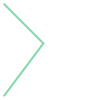

In [52]:
from shapely.geometry import Point, LineString

# Criando uma linha com o Objeto LineString

p1 = Point(2, 3)
p2 = Point(5, 7)
p3 = Point(2, 10)

linha = LineString([p1, p2, p3])
linha

In [54]:
# Alguns Atributos de LineString:

# Ponto medio da linha.
# Tamanho da linha
# Coordendas da linha

coordx, coordy = linha.xy

print("Coordenadas x:", coordx)
print("Coordenadas y:", coordy)

Coordenadas x: array('d', [2.0, 5.0, 2.0])
Coordenadas y: array('d', [3.0, 7.0, 10.0])


In [55]:
# Tamanho da linha
linha.length

9.242640687119284

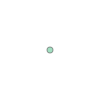

In [56]:
# Ponto central da linha
linha.centroid

### Polygon (Poligono)

Casos de uso:

- Delimitação de bacia geográfica;
- Delimitação de área rural;
- Divisão administrativa;
- Delimitação áreas urbanas;
- Entre outros:

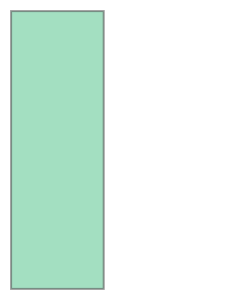

In [10]:
# Montando um poligono

poligomo = Polygon([(100, 200), (300, 200), (300, 800), (100, 800)])
poligomo

In [14]:
# Metodos do polygon

# - Calculo da area
# - Calculo do perimetro
# - Calculo do centroide

# Obtendo as corrdenadas do poligono

list(poligomo.exterior.coords)

[(100.0, 200.0),
 (300.0, 200.0),
 (300.0, 800.0),
 (100.0, 800.0),
 (100.0, 200.0)]

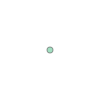

In [15]:
# Obter o centroid do poligono

poligomo.centroid

In [16]:
# Calcular a area do poligono
poligomo.area

120000.0

In [17]:
# Obter coordenadas do bounding box (Extremidades)
poligomo.bounds

(100.0, 200.0, 300.0, 800.0)

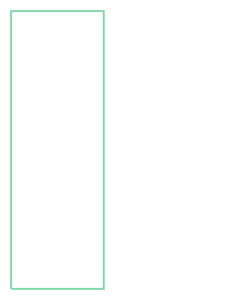

In [18]:
# obter as corrdenadas da linha exterior (Linearring)
poligomo.exterior

In [20]:
# Comprimento da linha exterior
poligomo.exterior.length

1600.0

### Operações entre geometrias

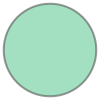

In [22]:
# Definindo duas áreas que serão empregadas no cálculo
 
a1 = Point(2,2).buffer(1)
a2 = Point(3,2).buffer(1)
a1

In [23]:
# Veja a quantidade de pontos em a1
print(a1)

POLYGON ((3 2, 2.995184726672197 1.9019828596704393, 2.9807852804032304 1.8049096779838718, 2.9569403357322086 1.7097153227455377, 2.923879532511287 1.6173165676349102, 2.881921264348355 1.5286032631740023, 2.8314696123025453 1.4444297669803978, 2.773010453362737 1.3656067158363545, 2.7071067811865475 1.2928932188134525, 2.6343932841636457 1.2269895466372631, 2.555570233019602 1.1685303876974547, 2.471396736825998 1.118078735651645, 2.3826834323650896 1.0761204674887133, 2.2902846772544625 1.043059664267791, 2.1950903220161284 1.0192147195967696, 2.098017140329561 1.0048152733278033, 2 1, 1.9019828596704393 1.004815273327803, 1.8049096779838718 1.0192147195967696, 1.709715322745538 1.043059664267791, 1.6173165676349104 1.0761204674887133, 1.5286032631740023 1.118078735651645, 1.444429766980398 1.1685303876974547, 1.3656067158363547 1.226989546637263, 1.2928932188134525 1.2928932188134525, 1.2269895466372631 1.3656067158363545, 1.1685303876974547 1.4444297669803978, 1.118078735651645 1.

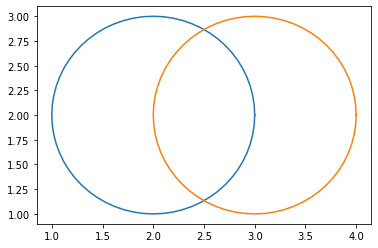

In [26]:
# Visualizar os dois pontos

import matplotlib.pyplot as plt

# Plot areas

# a1
x, y = a1.exterior.coords.xy
plt.plot(x, y);
# a2
x, y = a2.exterior.coords.xy
plt.plot(x, y);

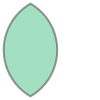

In [27]:
## Intersection

inter_section = a1.intersection(a2)
inter_section

In [28]:
inter_section.area

1.2249849273339504

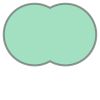

In [29]:
## Union

u_nion = a1.union(a2)
u_nion 

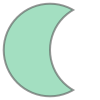

In [30]:
## Diference

di_ference = a1.difference(a2)
di_ference

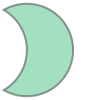

In [31]:
a2.difference(a1)

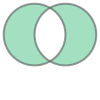

In [32]:
# Diference simetric

si_metric = a1.symmetric_difference(a2)
si_metric

## Trabalhando com Geopandas (GeoDataFrames)

Inicialmente vamos importar a base de dados de roubo de celulares do estado de [São Paulo](http://www.ssp.sp.gov.br/transparenciassp/Consulta.aspx).

Também iremos trabalhar com a base de crimes violentos letais intecionais (CVLI) do estado de Pernambuco. 

Inicialmente vamos trabalhar com os dados de São Paulo. Os dados são disponibilizados em uma extensão do tipo "xls",para manipular estes dados vamos utilizar a biblioteca *openpyxl*.

In [3]:
#!pip install openpyxl

In [7]:
# Bibliotecas

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [20]:
roubos_ph = pd.read_excel("/home/wesley/Downloads/DatasetsTutorials/GeopandasCurse/dados_roubo_celular_sp_2020.xlsx")
roubos_ph.head()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,2020,1646238,1646238/2020,01/11/2020 00:03:07,01/11/2020 00:01:32,31/10/2020,16:30,A TARDE,31/10/2020,01/11/2020 00:03:07,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,ASUS
1,2020,1646283,1646283/2020,01/11/2020 00:07:02,01/11/2020 00:06:41,31/10/2020,23:00,A NOITE,01/11/2020,01/11/2020 00:07:02,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,SAMSUNG
2,2020,1646274,1646274/2020,01/11/2020 00:10:26,01/11/2020 00:10:26,31/10/2020,21:42,A NOITE,31/10/2020,01/11/2020 00:10:26,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,APPLE
3,2020,1646303,1646303/2020,01/11/2020 00:21:22,01/11/2020 00:21:39,31/10/2020,14:17,A TARDE,01/11/2020,01/11/2020 00:21:22,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,XIAOMI
4,2020,1646234,1646234/2020,01/11/2020 00:29:43,01/11/2020 00:29:44,31/10/2020,19:05,A NOITE,31/10/2020,01/11/2020 00:29:43,...,EQT9081,SP,SÃO CAETANO DO SUL,Cinza,I/VW TIGUAN ALLSPACE,2018.0,NaN,AUTOMOVEL,NaN,APPLE


In [21]:
# Por algum erro da API os dados de longitude estao na coluna Descricao Local

# Vamos exclir os valores de NA
roubos_ph = roubos_ph.dropna(subset=["LATITUDE", "LONGITUDE"])
roubos_ph[["LATITUDE", "LONGITUDE"]].head()

,LATITUDE,LONGITUDE
1,-23.686360,-46.765585
2,-23.612298,-46.609388
3,-23.640576,-46.760755
4,-23.593117,-46.606192
5,-23.593117,-46.606192


In [23]:
roubos_ph[["LATITUDE", "LONGITUDE"]].dtypes

LATITUDE     float64
LONGITUDE    float64
dtype: object

#### Criando um geodataframe

Um GeoDataFrame é nada mais é que um Dataframe com uma coluna de geometria "geometry", em que esta coluna de geometria possui objetos da biblioteca Shapely. Para montar um geodataframe podemos criar a coluna geometry, do tipo Point com os dados de latitude e longitude.

In [39]:
# Criando a coluna geometry

roubos_ph["geometry"] = None

for index, row in roubos_ph.iterrows():
    roubos_ph.loc[index, "geometry"] = Point(row.LONGITUDE, row.LATITUDE)


/home/wesley/geoprocess/lib/python3.8/site-packages/pandas/core/internals/managers.py:304: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  applied = getattr(b, f)(**kwargs)


In [40]:
# Vendo os 5 primeiros dados
roubos_ph.geometry.head()

1    POINT (-46.7655849940429 -23.6863604960612)
2    POINT (-46.6093881566447 -23.6122975624363)
3    POINT (-46.7607553457118 -23.6405763334634)
4          POINT (-46.6061920346 -23.5931170972)
5          POINT (-46.6061920346 -23.5931170972)
Name: geometry, dtype: object

In [44]:
# Criando um geodataframe

roubos_gdf = gpd.GeoDataFrame(roubos_ph, geometry="geometry")
roubos_gdf.head()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR,geometry
1,2020,1646283,1646283/2020,01/11/2020 00:07:02,01/11/2020 00:06:41,31/10/2020,23:00,A NOITE,01/11/2020,01/11/2020 00:07:02,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,SAMSUNG,POINT (-46.76558 -23.68636)
2,2020,1646274,1646274/2020,01/11/2020 00:10:26,01/11/2020 00:10:26,31/10/2020,21:42,A NOITE,31/10/2020,01/11/2020 00:10:26,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,APPLE,POINT (-46.60939 -23.61230)
3,2020,1646303,1646303/2020,01/11/2020 00:21:22,01/11/2020 00:21:39,31/10/2020,14:17,A TARDE,01/11/2020,01/11/2020 00:21:22,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,XIAOMI,POINT (-46.76076 -23.64058)
4,2020,1646234,1646234/2020,01/11/2020 00:29:43,01/11/2020 00:29:44,31/10/2020,19:05,A NOITE,31/10/2020,01/11/2020 00:29:43,...,SP,SÃO CAETANO DO SUL,Cinza,I/VW TIGUAN ALLSPACE,2018.0,NaN,AUTOMOVEL,NaN,APPLE,POINT (-46.60619 -23.59312)
5,2020,1646234,1646234/2020,01/11/2020 00:29:43,01/11/2020 00:29:44,31/10/2020,19:05,A NOITE,31/10/2020,01/11/2020 00:29:43,...,SP,SÃO CAETANO DO SUL,Cinza,I/VW TIGUAN ALLSPACE,2018.0,NaN,AUTOMOVEL,NaN,SAMSUNG,POINT (-46.60619 -23.59312)


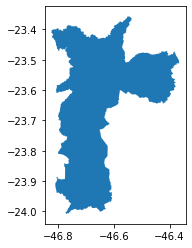

In [33]:
# Carregar o shape da cidade de sao paulo
path_file = "/home/wesley/Downloads/DatasetsTutorials/GeopandasCurse/SP_Municipios_2021/Capital_Shape/GeoJson/sao_paulo_capital.json"

sp_capital = gpd.read_file(path_file, driver="GeoJSON")

# Plot
sp_capital.plot();


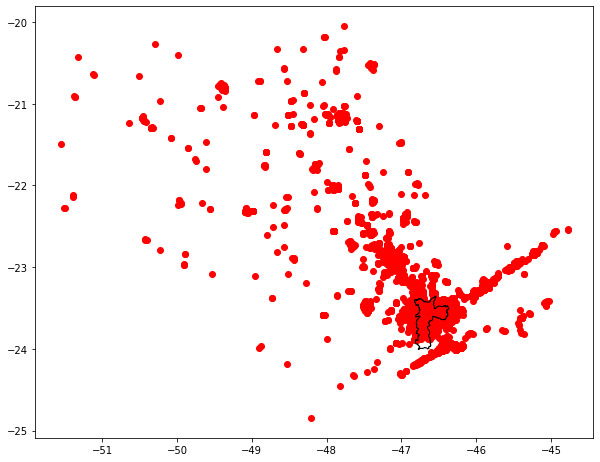

In [48]:
# Plotando os pontos dentro da capital 

fig, ax = plt.subplots(figsize=(10,10))

roubos_gdf.plot(ax=ax, facecolor="red")
sp_capital.plot(ax=ax, facecolor="None", edgecolor="black")

plt.show()

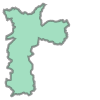

In [9]:
# Vamos interseccionar a geometria da cidade de sao paulo com os dados de roubos

# extrair a o poligono de sao paulo

poligono_sp = sp_capital.iloc[0].geometry

# vendo o poligono de sp
poligono_sp 

In [10]:
# Fazer a interseccao com os dados de roubo
roubos_capital = roubos_gdf[roubos_gdf.intersects(poligono_sp)]
roubos_capital[["LATITUDE", "LONGITUDE"]].head()

,LATITUDE,LONGITUDE
0,-23.686360,-46.765585
1,-23.612298,-46.609388
2,-23.640576,-46.760755
3,-23.593117,-46.606192
4,-23.593117,-46.606192


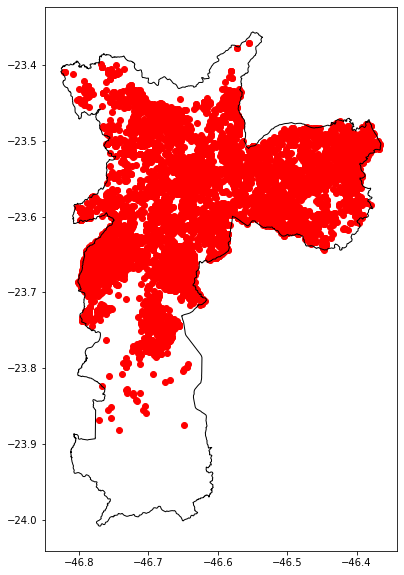

In [52]:
# Plotar o grafico para a capital

fig, ax = plt.subplots(figsize=(10,10))

roubos_capital.plot(ax=ax, facecolor="red")
sp_capital.plot(ax=ax, facecolor="None", edgecolor="black")

plt.show()

In [53]:
# Salvar os novos dados de roubo
path_file = "/home/wesley/Downloads/DatasetsTutorials/GeopandasCurse/SP_Municipios_2021/Capital_Shape/GeoJson/roubos_celuar_capital.json"

roubos_capital.to_file(path_file, driver="GeoJSON")

/home/wesley/geoprocess/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


## Criando Mapas Interativos

O github não renderiza gráficos interativos. Para visualizar os mapas interativos acesse o [link](https://nbviewer.org/github/WesleyJw/Learning/blob/main/Geoestatistica_pdi/GeopandasIntroduction.ipynb).

In [55]:
# Instalando a biblioteca folium

#!pip install folium

In [3]:
# Lib's Import 

import geopandas as gpd
import folium

In [57]:
# Criando um mapa simples com folium

map_f = folium.Map()
map_f

In [4]:
# Carregar os shapes com os dados Geograficos

# Dados de roubo
path_file = "/home/wesley/Downloads/DatasetsTutorials/GeopandasCurse/SP_Municipios_2021/Capital_Shape/GeoJson/roubos_celuar_capital.json"
roubos_gdf = gpd.read_file(path_file, driver="GeoJSON")
roubos_gdf.head(3)

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,FLAGRANTE,NUMERO_BOLETIM_PRINCIPAL,LOGRADOURO,NUMERO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,EXAME,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,DESDOBRAMENTO,STATUS,NOMEPESSOA,TIPOPESSOA,VITIMAFATAL,RG,RG_UF,NATURALIDADE,NACIONALIDADE,SEXO,DATANASCIMENTO,IDADE,ESTADOCIVIL,PROFISSAO,GRAUINSTRUCAO,CORCUTIS,NATUREZAVINCULADA,TIPOVINCULO,RELACIONAMENTO,PARENTESCO,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR,geometry
0,2020,1646283,1646283/2020,01/11/2020 00:07:02,01/11/2020 00:06:41,31/10/2020,23:00:00,A NOITE,01/11/2020,01/11/2020 00:07:02,Desconhecida,Não,None,RUA PROFESSOR BARROSO DO AMARAL,410.0,JARDIM ANGELA,S.PAULO,SP,-23.686360,-46.765585,Via Pública,None,BO PARA REGISTRO,DELEGACIA ELETRONICA,100º D.P. JDIM HERCULANO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - OUTROS,None,Consumado,None,None,None,NaN,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,0.0,0.0,None,NaN,SAMSUNG,POINT (-46.76558 -23.68636)
1,2020,1646274,1646274/2020,01/11/2020 00:10:26,01/11/2020 00:10:26,31/10/2020,21:42:00,A NOITE,31/10/2020,01/11/2020 00:10:26,Desconhecida,Não,None,RUA GUAPEROBA,251.0,JARDIM COLINA,S.PAULO,SP,-23.612298,-46.609388,Via Pública,None,BO PARA REGISTRO,DELEGACIA ELETRONICA,26º D.P. SACOMA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - OUTROS,None,Consumado,None,None,None,NaN,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,0.0,0.0,None,NaN,APPLE,POINT (-46.60939 -23.61230)
2,2020,1646303,1646303/2020,01/11/2020 00:21:22,01/11/2020 00:21:39,31/10/2020,14:17:00,A TARDE,01/11/2020,01/11/2020 00:21:22,Desconhecida,Não,None,RUA FORTE DA BARRA,366.0,CAMPO LIMPO,S.PAULO,SP,-23.640576,-46.760755,Via Pública,None,BO PARA REGISTRO,DELEGACIA ELETRONICA,37º D.P. CAMPO LIMPO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - OUTROS,None,Consumado,None,None,None,NaN,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,0.0,0.0,None,NaN,XIAOMI,POINT (-46.76076 -23.64058)


In [5]:
# Dados de roubo
path_file1 = "/home/wesley/Downloads/DatasetsTutorials/GeopandasCurse/SP_Municipios_2021/Capital_Shape/GeoJson/sao_paulo_capital.json"
sp_capital = gpd.read_file(path_file1, driver="GeoJSON")
sp_capital.head()

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,3550308,São Paulo,SP,1521.202,"POLYGON ((-46.54624 -23.35791, -46.54585 -23.3..."


In [63]:
# OBS: Renderizar o grafico com todos os dados pode se tornar
# algo muito pesado e o notebook acabar ficando muito lento
# ou mesmo apresentar problemas
 
# Renderizar o mapa para os 200 dados inicias

roubos_gdf_slice = roubos_gdf.iloc[:200]

# Definindo o ponto de inicializacao do grafico

# Encontrando o ponto medio de lat e lon
mean_lat = roubos_gdf_slice["LATITUDE"].mean()
mean_lon = roubos_gdf_slice["LONGITUDE"].mean()

fmap = folium.Map(location=[mean_lat, mean_lon])

feature_geojson = folium.features.GeoJson(roubos_gdf_slice)
fmap.add_child(feature_geojson)
fmap

In [64]:
# Qual o procedimento para plotar todos os dados? 
# Podemos utilizar um plugin do folium para melhorar a visualização
# o quel e capaz de fazer agrupamentos dinâmicos

from folium.plugins import FastMarkerCluster

In [65]:
# Encontrando o ponto medio de lat e lon
mean_lat = roubos_gdf["LATITUDE"].mean()
mean_lon = roubos_gdf["LONGITUDE"].mean()

fmap = folium.Map(location=[mean_lat, mean_lon])

fmc = FastMarkerCluster(roubos_capital[['LATITUDE', 'LONGITUDE']])
fmap.add_child(fmc)
fmap

**Vamos melhorar a aparência deste mapa?**

- Trocar o mapa base;
- Adicionar as fronteiras da nossa cidade;
- Trocar o estilo dos dados.

In [66]:
mean_lat = roubos_gdf["LATITUDE"].mean()
mean_lon = roubos_gdf["LONGITUDE"].mean()

# recriando o mapa, com parametro tiles definido com 'cartodbpositron'
fmap = folium.Map(location=[mean_lat, mean_lon], tiles = "cartodbpositron")

# criando o GeoJson com a geometria dos limites
limites = folium.features.GeoJson(sp_capital,
                                  style_function = lambda feature:{
                                      'color': "darkgray",
                                      'weight': 2,
                                      'fillOpacity': 0.0})
# adicionando os limites ao mapa
fmap.add_child(limites)

# cria o objeto com o marcador de clusterização
fmc = FastMarkerCluster(roubos_capital[['LATITUDE', 'LONGITUDE']])

# adicionar marcador ao mapa
fmap.add_child(fmc)
fmap

In [67]:
# Salvando o mapa
path_file2 = "/home/wesley/Downloads/DatasetsTutorials/GeopandasCurse/SP_Municipios_2021/Capital_Shape/GeoJson/mapa_sao_paulo_roubos.html"
fmap.save(path_file2)

#### Trabalhando com HeatMap (Mapa de calor)

In [1]:
# lib 
from folium.plugins import HeatMap


In [11]:
mean_lat = roubos_gdf["LATITUDE"].mean()
mean_lon = roubos_gdf["LONGITUDE"].mean()

# recriando o mapa, com parametro tiles definido com 'cartodbpositron'
fmap = folium.Map(location=[mean_lat, mean_lon], tiles = "cartodbpositron")

# criando o GeoJson com a geometria dos limites
limites = folium.features.GeoJson(sp_capital,
                                  style_function = lambda feature:{
                                      'color': "darkgray",
                                      'weight': 2,
                                      'fillOpacity': 0.0})
# adicionando os limites ao mapa
fmap.add_child(limites)

# cria o objeto com o marcador de clusterização
fmc = HeatMap(roubos_capital[['LATITUDE', 'LONGITUDE']])

# adicionar marcador ao mapa
fmap.add_child(fmc)
fmap

In [12]:
path_file3 = "/home/wesley/Downloads/DatasetsTutorials/GeopandasCurse/SP_Municipios_2021/Capital_Shape/GeoJson/mapa_sao_paulo_roubos_heatmap.html"
fmap.save(path_file3)

### Adicionando dados Estatísticos

In [22]:
path_files = "/home/wesley/Downloads/DatasetsTutorials/GeopandasCurse/SP_Municipios_2021/Capital_Shape/GeoJson/"

# Read shape dos municípios de grande são paulo
gsp_gbf = gpd.read_file(f"{path_files}municipios_grande_sp.json", driver="GeoJSON")

# Dados de roubo da grande são paulo
roubos_gsp = gpd.read_file(f"{path_files}roubos_celular_grande_sp.jon", driver="GeoJSON")



In [25]:
# obter soma do numero de roubos por municipio

roubos_gsp_mun = roubos_gsp.groupby("CIDADE").ANO_BO.count()
roubos_gsp_mun.head()

CIDADE
ARUJA       17
BARUERI     52
CABREUVA     1
CAIEIRAS    13
CAJAMAR      9
Name: ANO_BO, dtype: int64

In [26]:
# Calculando a quantidade de roubos com base no intersection

# Veja q a quantidade de roubos por municipio se altera
# Porem a soma geral e a mesma, possivelmente alguns roubos sao 
# registrados em outros municipios
# por meio do intersection obtemos a quantidade real de roubos

for index, municipio in gsp_gbf.iterrows():
    
    qtd_roubos = len(roubos_gsp[roubos_gsp.intersects(municipio.geometry)])
    
    gsp_gbf.loc[index, "qtd_roubos"] = qtd_roubos

In [27]:
gsp_gbf.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,qtd_roubos
0,3503901,Arujá,SP,96.167,"POLYGON ((-46.36995 -23.37809, -46.37010 -23.3...",18.0
1,3505708,Barueri,SP,65.701,"POLYGON ((-46.83848 -23.51062, -46.83921 -23.5...",51.0
2,3506607,Biritiba Mirim,SP,317.406,"POLYGON ((-46.09244 -23.56664, -46.09256 -23.5...",0.0
3,3509007,Caieiras,SP,97.642,"POLYGON ((-46.82345 -23.35390, -46.82345 -23.3...",13.0
4,3509205,Cajamar,SP,131.386,"POLYGON ((-46.90468 -23.35731, -46.90538 -23.3...",17.0


In [43]:
mean_lat = roubos_gsp["LATITUDE"].mean()
mean_lon = roubos_gsp["LONGITUDE"].mean()

# recriando o mapa, com parametro tiles definido com 'cartodbpositron'
fmap = folium.Map(location=[mean_lat, mean_lon], tiles = "cartodbpositron")

# criando o GeoJson com a geometria dos limites
for _, municipio in gsp_gbf.iterrows():
    
    limite_mun = folium.features.GeoJson(gsp_gbf.geometry,
                                  style_function = lambda feature:{
                                      'color': "darkblue",
                                      'weight': 2,
                                      'fillOpacity': 0.1})
    
    popups = folium.Popup("""
                          Município: {} <br>
                          Número de Celulares Roubados: {}
                          """.format(municipio.NM_MUN, str(int(municipio.qtd_roubos))),
                          max_width=320)
    # adicionando os limites ao mapa
    popups.add_to(limite_mun)
    limite_mun.add_to(fmap)

In [44]:
fmap.save(f"{path_files}mapa_grande_sao_paulo_roubos.html")